In [2]:
import pandas as pd

## Web Scraping data from basketball-reference.com

In [35]:
url_2019 = "https://www.basketball-reference.com/leagues/NBA_2019_per_game.html"
url_2020 = "https://www.basketball-reference.com/leagues/NBA_2020_per_game.html"

html = pd.read_html(url_2019, header=0)
df2019 = html[0]

In [36]:
df2019.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,...,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,4,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9


## **Acronyms**


Acronym | Description
---|---
Rk | Rank
Pos | Position
Age | Player's age on February 1 of the season
Tm | Team
G | Games
GS | Games Started
MP | Minutes Played Per Game
FG | Field Goals Per Game
FGA | Field Goal Attempts Per Game
FG% | Field Goal Percentage
3P | 3-Point Field Goals Per Game
3PA | 3-Point Field Goal Attempts Per Game
3P% | FG% on 3-Pt FGAs.
2P | 2-Point Field Goals Per Game
2PA | 2-Point Field Goal Attempts Per Game
2P% | FG% on 2-Pt FGAs.
eFG% | Effective Field Goal Percentage
| *(Note: This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.)*
FT | Free Throws Per Game
FTA | Free Throw Attempts Per Game
FT% | Free Throw Percentage
ORB | Offensive Rebounds Per Game
DRB | Defensive Rebounds Per Game
TRB | Total Rebounds Per Game
AST | Assists Per Game
STL | Steals Per Game
BLK | Blocks Per Game
TOV | Turnovers Per Game
PF | Personal Fouls Per Game
PTS | Points Per Game

## Data Cleaning

### Remove the repeated columns header in the DataFrame

In [37]:
raw = df2019.drop(df2019[df2019["Age"] == "Age"].index)

In [39]:
raw["Age"].value_counts() ## No more repeated columns header

23    75
26    66
28    60
24    58
21    58
22    56
25    55
27    53
30    41
29    40
32    31
31    26
20    25
33    21
34    12
19    11
38     5
36     5
37     5
35     3
42     1
40     1
Name: Age, dtype: int64

In [41]:
raw.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,...,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,4,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9


### Check for any missing values in the dataframe

In [44]:
raw.isnull().sum()

Rk         0
Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        6
3P         0
3PA        0
3P%       47
2P         0
2PA        0
2P%       15
eFG%       6
FT         0
FTA        0
FT%       43
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64

### Replace the null value to 0 and recheck

In [47]:
raw.fillna(0, inplace=True)

In [49]:
raw.isnull().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

### Drop unnecessary column and recheck the dataframe

In [52]:
df = raw.drop(["Rk"], axis=1) ## Rank does not mean anything in this EDA.
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,.357,...,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,.222,...,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,.345,...,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,.595,...,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,.576,...,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9


### Save the CSV file

In [56]:
df.to_csv("nba2k19.csv", index=False)

### Write the file from CSV

In [3]:
df2k19 = pd.read_csv("nba2k19.csv")
df2k19

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,0.357,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,0.222,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,0.345,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,0.595,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,0.576,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,0.571,...,0.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
704,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,0.553,...,0.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
705,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,0.559,...,0.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
706,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,0.580,...,0.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


## Check data type from each column

In [58]:
df2k19.dtypes

Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

In [59]:
### Check with the data with specific type
df2k19.select_dtypes(include=["object"])

,Player,Pos,Tm
0,Álex Abrines,SG,OKC
1,Quincy Acy,PF,PHO
2,Jaylen Adams,PG,ATL
3,Steven Adams,C,OKC
4,Bam Adebayo,C,MIA
...,...,...,...
703,Tyler Zeller,C,MEM
704,Ante Žižić,C,CLE
705,Ivica Zubac,C,TOT
706,Ivica Zubac,C,LAL


In [61]:
df2k19.select_dtypes(include=["number"]) ## number are included float

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,25,31,2,19.0,1.8,5.1,0.357,1.3,4.1,0.323,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,28,10,0,12.3,0.4,1.8,0.222,0.2,1.5,0.133,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,22,34,1,12.6,1.1,3.2,0.345,0.7,2.2,0.338,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,25,80,80,33.4,6.0,10.1,0.595,0.0,0.0,0.000,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,21,82,28,23.3,3.4,5.9,0.576,0.0,0.2,0.200,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,29,4,1,20.5,4.0,7.0,0.571,0.0,0.0,0.000,...,0.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
704,22,59,25,18.3,3.1,5.6,0.553,0.0,0.0,0.000,...,0.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
705,21,59,37,17.6,3.6,6.4,0.559,0.0,0.0,0.000,...,0.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
706,21,33,12,15.6,3.4,5.8,0.580,0.0,0.0,0.000,...,0.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


## Questions

### Q1 Who scored the most point per game?

In [64]:
df2k19[df2k19["PTS"] == df2k19["PTS"].max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
267,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,0.442,...,0.879,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1


### Q2 Further question from Q1, What team is he from?

In [67]:
df2k19[df2k19["PTS"] == df2k19["PTS"].max()]["Tm"]

## If you need the specific information of this player, always can refer to columns title for more

267    HOU
Name: Tm, dtype: object

### Q3 Who scored the less point per game?

In [70]:
df2k19[df2k19["PTS"] == df2k19["PTS"].min()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
18,Ike Anigbogu,C,20,IND,3,0,2.0,0.0,1.0,0.0,...,0.0,0.3,0.7,1.0,0.3,0.0,0.3,0.3,0.0,0.0
33,Ron Baker,SG,25,WAS,4,0,11.3,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.5,0.3,0.3,0.5,0.5,0.0
164,Tyler Davis,C,21,OKC,1,0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
208,Jawun Evans,PG,22,OKC,1,0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
253,Donte Grantham,SF,23,OKC,3,0,0.7,0.0,0.7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
302,John Holland,SF,30,CLE,1,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
319,Andre Ingram,SG,33,LAL,4,0,3.8,0.0,1.5,0.0,...,0.0,0.3,0.3,0.5,0.0,0.3,0.0,0.3,0.0,0.0
370,George King,SF,25,PHO,1,0,6.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
406,Zach Lofton,SG,26,DET,1,0,4.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
478,Eric Moreland,PF,27,PHO,1,0,5.0,0.0,0.0,0.0,...,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0


### Q4 How many players scored at least 20 points per game?

In [75]:
df2k19[df2k19["PTS"] >= 20]["Player"].count()

37

In [125]:
df2k19[df2k19["PTS"] >= 20].sort_values(by=["PTS"],ascending=False)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
267,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,0.442,...,0.879,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1
240,Paul George,SF,28,OKC,77,77,36.9,9.2,21.0,0.438,...,0.839,1.4,6.8,8.2,4.1,2.2,0.4,2.7,2.8,28.0
19,Giannis Antetokounmpo,PF,24,MIL,72,72,32.8,10.0,17.3,0.578,...,0.729,2.2,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7
200,Joel Embiid,C,24,PHI,64,64,33.7,9.1,18.7,0.484,...,0.804,2.5,11.1,13.6,3.7,0.7,1.9,3.5,3.3,27.5
332,LeBron James,SF,34,LAL,55,55,35.2,10.1,19.9,0.510,...,0.665,1.0,7.4,8.5,8.3,1.3,0.6,3.6,1.7,27.4
159,Stephen Curry,PG,30,GSW,69,69,33.8,9.2,19.4,0.472,...,0.916,0.7,4.7,5.3,5.2,1.3,0.4,2.8,2.4,27.3
397,Kawhi Leonard,SF,27,TOR,60,60,34.0,9.3,18.8,0.496,...,0.854,1.3,6.0,7.3,3.3,1.8,0.4,2.0,1.5,26.6
68,Devin Booker,SG,22,PHO,64,64,35.0,9.2,19.6,0.467,...,0.866,0.6,3.5,4.1,6.8,0.9,0.2,4.1,3.1,26.6
191,Kevin Durant,SF,30,GSW,78,78,34.6,9.2,17.7,0.521,...,0.885,0.4,5.9,6.4,5.9,0.7,1.1,2.9,2.0,26.0
161,Anthony Davis,C,25,NOP,56,56,33.0,9.5,18.3,0.517,...,0.794,3.1,8.9,12.0,3.9,1.6,2.4,2.0,2.4,25.9


### Q4 How many players have average double double per game?

#### Method 1 by using conditional selection.

In [136]:
df2k19[(df2k19["PTS"] >= 10) & ((df2k19["TRB"] >= 10) | (df2k19["AST"] >= 10) | (df2k19["STL"] >=10) | (df2k19["BLK"] >= 10))]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
19,Giannis Antetokounmpo,PF,24,MIL,72,72,32.8,10.0,17.3,0.578,...,0.729,2.2,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7
28,Deandre Ayton,C,20,PHO,71,70,30.7,7.2,12.3,0.585,...,0.746,3.1,7.1,10.3,1.8,0.9,0.9,1.8,2.9,16.3
112,Clint Capela,C,24,HOU,67,67,33.6,7.1,10.9,0.648,...,0.636,4.4,8.2,12.7,1.4,0.7,1.5,1.4,2.5,16.6
161,Anthony Davis,C,25,NOP,56,56,33.0,9.5,18.3,0.517,...,0.794,3.1,8.9,12.0,3.9,1.6,2.4,2.0,2.4,25.9
188,Andre Drummond,C,25,DET,79,79,33.5,7.1,13.3,0.533,...,0.590,5.4,10.2,15.6,1.4,1.7,1.7,2.2,3.4,17.3
200,Joel Embiid,C,24,PHI,64,64,33.7,9.1,18.7,0.484,...,0.804,2.5,11.1,13.6,3.7,0.7,1.9,3.5,3.3,27.5
244,Rudy Gobert,C,26,UTA,81,80,31.8,5.9,8.8,0.669,...,0.636,3.8,9.0,12.9,2.0,0.8,2.3,1.6,2.9,15.9
353,Nikola Jokić,C,23,DEN,80,80,31.3,7.7,15.1,0.511,...,0.821,2.9,8.0,10.8,7.3,1.4,0.7,3.1,2.9,20.1
360,DeAndre Jordan,C,30,TOT,69,69,29.7,4.1,6.5,0.641,...,0.705,3.3,9.8,13.1,2.3,0.6,1.1,2.2,2.4,11.0
361,DeAndre Jordan,C,30,DAL,50,50,31.1,4.2,6.5,0.644,...,0.682,3.2,10.5,13.7,2.0,0.7,1.1,2.2,2.5,11.0


#### Method 2 by creating a condition function

In [133]:
df2k19["PTS"].max() , df2k19["TRB"].max(), df2k19["AST"].max(), df2k19["STL"].max(), df2k19["BLK"].max()

(36.1, 15.6, 10.7, 2.4, 2.7)

In [141]:
## We can exluded steal per game and block per game as the max of both did not exceed double digit
def count_double_double(df):
    if df["PTS"] >= 10:
        if df["AST"] >= 10 or df["TRB"] >= 10:
            return True
        else:
            return False
    elif df["AST"] >= 10:
        if df["TRB"] >= 10 or df["PTS"] >= 10:
            return True
        else:
            return False
    elif df["TRB"] >= 10:
        if df["PTS"] >= 10 or df["AST"] >= 10:
            return True
        else:
            return False
    else:
        return False

In [142]:
df2k19[df2k19.apply(count_double_double,axis=1)]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
19,Giannis Antetokounmpo,PF,24,MIL,72,72,32.8,10.0,17.3,0.578,...,0.729,2.2,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7
28,Deandre Ayton,C,20,PHO,71,70,30.7,7.2,12.3,0.585,...,0.746,3.1,7.1,10.3,1.8,0.9,0.9,1.8,2.9,16.3
112,Clint Capela,C,24,HOU,67,67,33.6,7.1,10.9,0.648,...,0.636,4.4,8.2,12.7,1.4,0.7,1.5,1.4,2.5,16.6
161,Anthony Davis,C,25,NOP,56,56,33.0,9.5,18.3,0.517,...,0.794,3.1,8.9,12.0,3.9,1.6,2.4,2.0,2.4,25.9
188,Andre Drummond,C,25,DET,79,79,33.5,7.1,13.3,0.533,...,0.590,5.4,10.2,15.6,1.4,1.7,1.7,2.2,3.4,17.3
200,Joel Embiid,C,24,PHI,64,64,33.7,9.1,18.7,0.484,...,0.804,2.5,11.1,13.6,3.7,0.7,1.9,3.5,3.3,27.5
244,Rudy Gobert,C,26,UTA,81,80,31.8,5.9,8.8,0.669,...,0.636,3.8,9.0,12.9,2.0,0.8,2.3,1.6,2.9,15.9
353,Nikola Jokić,C,23,DEN,80,80,31.3,7.7,15.1,0.511,...,0.821,2.9,8.0,10.8,7.3,1.4,0.7,3.1,2.9,20.1
360,DeAndre Jordan,C,30,TOT,69,69,29.7,4.1,6.5,0.641,...,0.705,3.3,9.8,13.1,2.3,0.6,1.1,2.2,2.4,11.0
361,DeAndre Jordan,C,30,DAL,50,50,31.1,4.2,6.5,0.644,...,0.682,3.2,10.5,13.7,2.0,0.7,1.1,2.2,2.5,11.0


In [143]:
print("Total player average double double per game:", df2k19[df2k19.apply(count_double_double,axis=1)]["Player"].count())

Total player average double double per game: 20


### Q5 How many players have average triple double per game?

In [144]:
## We can exluded steal per game and block per game as the max of both did not exceed double digit
def count_triple_double(df):
    if df["PTS"] >= 10:
        if df["AST"] >= 10 and df["TRB"] >= 10:
            return True
        else:
            return False
    elif df["AST"] >= 10:
        if df["TRB"] >= 10 and df["PTS"] >= 10:
            return True
        else:
            return False
    elif df["TRB"] >= 10:
        if df["PTS"] >= 10 and df["AST"] >= 10:
            return True
        else:
            return False
    else:
        return False

In [145]:
df2k19[df2k19.apply(count_triple_double,axis=1)]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
675,Russell Westbrook,PG,30,OKC,73,73,36.0,8.6,20.2,0.428,...,0.656,1.5,9.6,11.1,10.7,1.9,0.5,4.5,3.4,22.9


In [147]:
print("Total player average triple double per game:", df2k19[df2k19.apply(count_triple_double,axis=1)]["Player"].count())

Total player average triple double per game: 1


### Q6 Further question from Q5, which player average triple double per game?

In [154]:
print("Player average triple double per game:", df2k19[df2k19.apply(count_triple_double,axis=1)]["Player"].values[0])

Player average triple double per game: Russell Westbrook


### Q7 Which player scored the highest point in Los Angeles Clipper?

#### Use the groupby and get_group to get the player group in a team

In [157]:
LAC = df2k19.groupby("Tm").get_group("LAC")
LAC

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
56,Patrick Beverley,PG,30,LAC,78,49,27.4,2.5,6.1,0.407,...,0.780,1.0,4.0,5.0,3.8,0.9,0.6,1.1,3.4,7.6
71,Avery Bradley,SG,28,LAC,49,49,29.9,3.3,8.6,0.383,...,0.800,0.7,2.0,2.7,2.0,0.6,0.3,1.2,2.7,8.2
130,Wilson Chandler,SF,31,LAC,15,1,15.1,1.5,4.4,0.348,...,0.714,0.3,2.9,3.1,0.7,0.2,0.2,0.5,1.9,4.3
169,Ángel Delgado,C,24,LAC,2,0,7.5,0.5,2.5,0.200,...,0.500,1.0,1.0,2.0,0.0,0.5,0.0,0.0,1.0,1.5
230,Danilo Gallinari,SF,30,LAC,68,68,30.3,6.0,13.0,0.463,...,0.904,0.8,5.3,6.1,2.6,0.7,0.3,1.5,1.9,19.8
243,Shai Gilgeous-Alexander,PG,20,LAC,82,73,26.5,4.2,8.7,0.476,...,0.800,0.7,2.1,2.8,3.3,1.2,0.5,1.7,2.1,10.8
248,Marcin Gortat,C,34,LAC,47,43,16.0,2.1,4.0,0.532,...,0.729,1.4,4.1,5.6,1.4,0.1,0.5,1.1,2.0,5.0
259,JaMychal Green,PF,28,LAC,24,2,19.6,3.3,6.8,0.482,...,0.810,1.3,5.2,6.5,0.6,0.5,0.3,1.0,2.9,8.7
269,Montrezl Harrell,C,25,LAC,82,5,26.3,6.7,10.8,0.615,...,0.643,2.2,4.3,6.5,2.0,0.9,1.3,1.6,3.1,16.6
274,Tobias Harris,PF,26,LAC,55,55,34.6,7.7,15.5,0.496,...,0.877,0.7,7.2,7.9,2.7,0.7,0.4,2.0,2.2,20.9


In [159]:
LAC[LAC["PTS"] == LAC["PTS"].max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
274,Tobias Harris,PF,26,LAC,55,55,34.6,7.7,15.5,0.496,...,0.877,0.7,7.2,7.9,2.7,0.7,0.4,2.0,2.2,20.9


### Q8 Out of the 5 positions, which position score the most the points?

In [165]:
df2k19.groupby("Pos")["PTS"].describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,120.0,8.785000,5.616582,0.0,4.175,7.75,12.350,27.5
C-PF,1.0,5.000000,NaN,5.0,5.000,5.00,5.000,5.0
PF,147.0,7.703401,5.622380,0.0,3.350,6.30,11.100,27.7
PF-C,1.0,3.300000,NaN,3.3,3.300,3.30,3.300,3.3
PF-SF,2.0,11.200000,7.353911,6.0,8.600,11.20,13.800,16.4
PG,139.0,8.668345,6.284234,0.0,4.300,7.00,11.050,36.1
SF,120.0,8.259167,5.935203,0.0,4.200,6.70,11.600,28.0
SF-SG,2.0,15.450000,4.596194,12.2,13.825,15.45,17.075,18.7
SG,174.0,8.487356,5.724974,0.0,4.000,7.65,11.275,26.6


#### We will only consider the 5 traditional position. (Combo position will remove from the data)

In [174]:
positions = ["C", "PF", "PG", "SF", "SG"]

POS = df2k19[df2k19["Pos"].isin(positions)]
POS["Pos"].value_counts()

SG    174
PF    147
PG    139
C     120
SF    120
Name: Pos, dtype: int64

In [196]:
POS.groupby("Pos").describe()["PTS"]

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,120.0,8.785000,5.616582,0.0,4.175,7.75,12.350,27.5
PF,147.0,7.703401,5.622380,0.0,3.350,6.30,11.100,27.7
PG,139.0,8.668345,6.284234,0.0,4.300,7.00,11.050,36.1
SF,120.0,8.259167,5.935203,0.0,4.200,6.70,11.600,28.0
SG,174.0,8.487356,5.724974,0.0,4.000,7.65,11.275,26.6


In [198]:
print("Position scored the highest score:", POS.groupby("Pos").describe()["PTS"].idxmax()["max"])

Position scored the highest score: PG


## Graphical Analysis

In [4]:
## import visualization packages
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Histogram by points for each position

In [206]:
## Create subset dataframe
df_PTS = POS[["Pos","PTS"]]
df_PTS

,Pos,PTS
0,SG,5.3
1,PF,1.7
2,PG,3.2
3,C,13.9
4,C,8.9
...,...,...
703,C,11.5
704,C,7.8
705,C,8.9
706,C,8.5


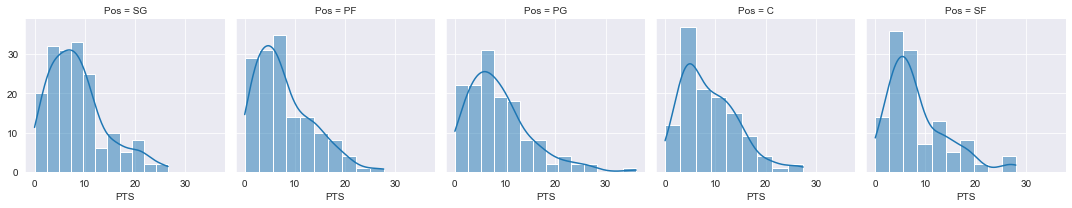

In [211]:
g = sns.FacetGrid(data=df_PTS, col="Pos")
g.map(sns.histplot, "PTS", kde=True)

### Box score by points for each position

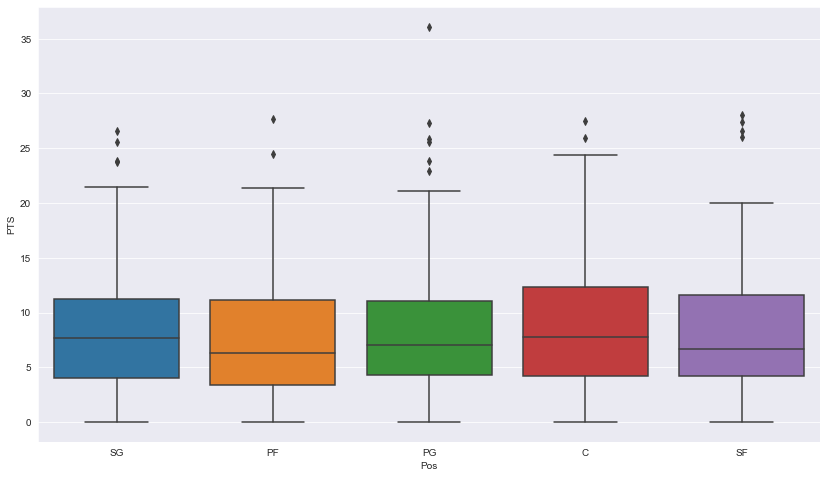

In [219]:
g = sns.boxplot(x="Pos", y="PTS", data=df_PTS)
           
## Size setting
g.figure.set_figwidth(14)
g.figure.set_figheight(8)

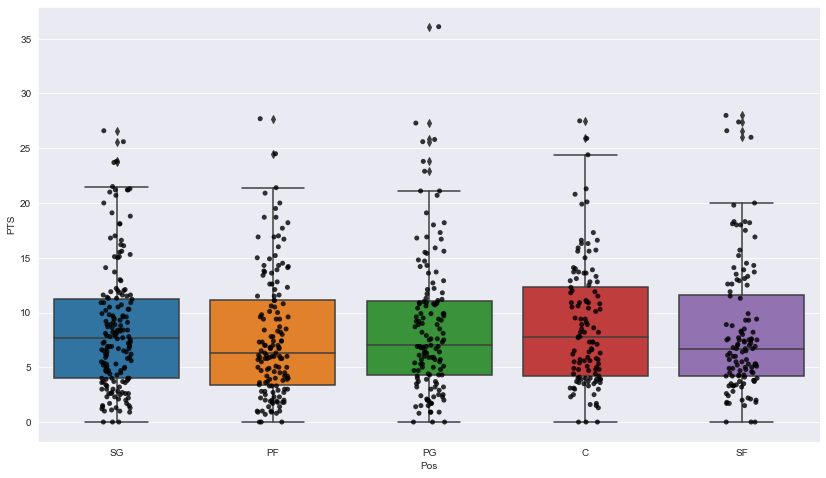

In [222]:
g = sns.boxplot(x="Pos", y="PTS", data=df_PTS)
sns.stripplot(x = "Pos", y = "PTS", data = df_PTS,
              jitter=True, 
              marker='o',
              alpha=0.8, 
              color="black")

## Size setting
g.figure.set_figwidth(14)
g.figure.set_figheight(8)

### Heatmap

In [224]:
df2k19.corr()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Age,1.000000,0.067822,0.040582,0.146543,0.058213,0.073779,0.036927,0.166271,0.159218,0.080328,...,0.171646,-0.016292,0.103831,0.072544,0.141556,0.080757,0.012428,0.063740,0.108226,0.081915
G,0.067822,1.000000,0.641484,0.617229,0.541442,0.521988,0.297932,0.396163,0.376494,0.190439,...,0.419104,0.288914,0.441461,0.421579,0.412688,0.404403,0.338509,0.473385,0.475785,0.534349
GS,0.040582,0.641484,1.000000,0.764661,0.724611,0.711811,0.208333,0.496450,0.485661,0.147906,...,0.267027,0.377497,0.599080,0.567642,0.563876,0.566980,0.424585,0.649941,0.537722,0.720953
MP,0.146543,0.617229,0.764661,1.000000,0.870974,0.892272,0.250899,0.686999,0.693822,0.263535,...,0.454169,0.386490,0.695738,0.642351,0.675725,0.734732,0.438661,0.766357,0.730804,0.875831
FG,0.058213,0.541442,0.724611,0.870974,1.000000,0.973355,0.351566,0.604936,0.600830,0.218206,...,0.371598,0.464378,0.723009,0.687463,0.665761,0.635615,0.460076,0.830099,0.624156,0.990014
FGA,0.073779,0.521988,0.711811,0.892272,0.973355,1.000000,0.209266,0.710099,0.725114,0.254855,...,0.395902,0.331235,0.649522,0.590755,0.703093,0.659276,0.362490,0.832446,0.591815,0.980447
FG%,0.036927,0.297932,0.208333,0.250899,0.351566,0.209266,1.000000,-0.018308,-0.089491,0.171014,...,0.203334,0.452070,0.365379,0.414942,0.106054,0.161195,0.380163,0.214178,0.351862,0.305803
3P,0.166271,0.396163,0.496450,0.686999,0.604936,0.710099,-0.018308,1.000000,0.978692,0.484236,...,0.385127,-0.136075,0.266407,0.156793,0.454015,0.475153,0.025957,0.463594,0.353059,0.669458
3PA,0.159218,0.376494,0.485661,0.693822,0.600830,0.725114,-0.089491,0.978692,1.000000,0.410159,...,0.377633,-0.154240,0.259847,0.146277,0.480880,0.489862,0.022530,0.486354,0.353207,0.666673
3P%,0.080328,0.190439,0.147906,0.263535,0.218206,0.254855,0.171014,0.484236,0.410159,1.000000,...,0.262347,-0.195221,0.045131,-0.027438,0.195202,0.147455,-0.098000,0.132833,0.094418,0.246776


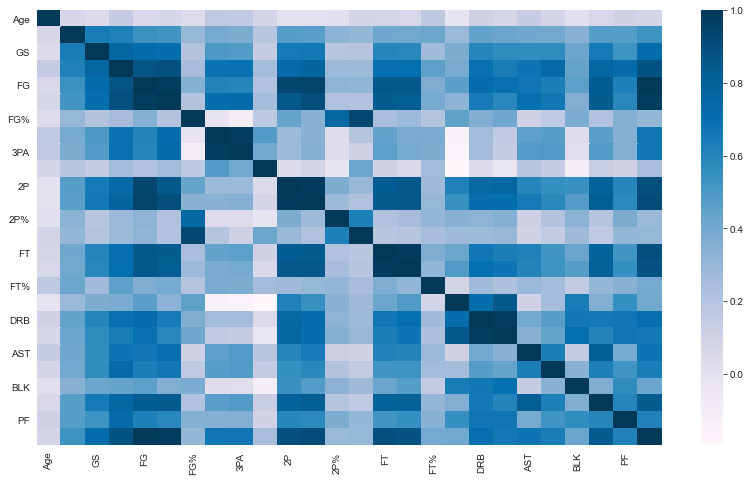

In [231]:
g = sns.heatmap(df2k19.corr(), cmap="PuBu")

## Size setting
g.figure.set_figwidth(14)
g.figure.set_figheight(8)

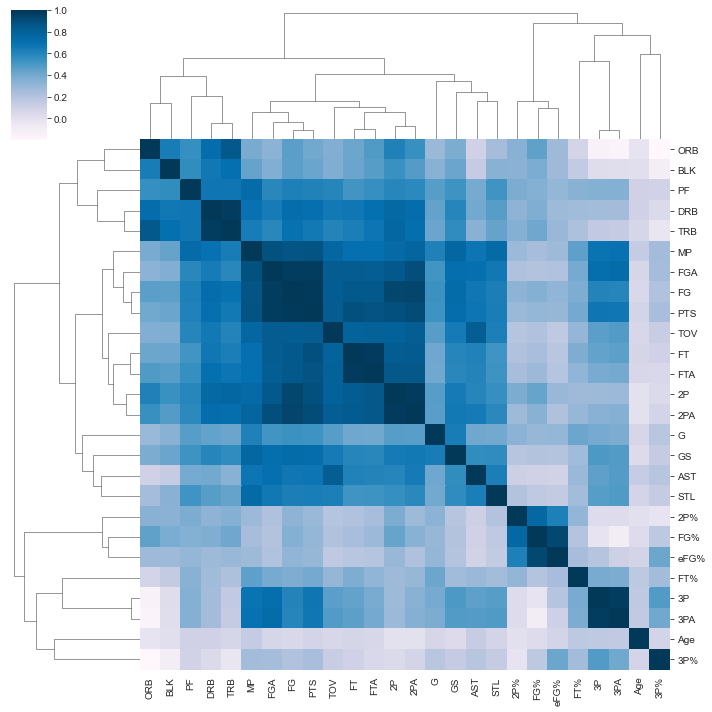

In [233]:
sns.clustermap(df2k19.corr(), cmap="PuBu")

## Size setting
g.figure.set_figwidth(18)
g.figure.set_figheight(8)

### Scatterplot

In [237]:
## Method to select number type data in the DataFrame
df2k19.select_dtypes(include=["number"])

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,25,31,2,19.0,1.8,5.1,0.357,1.3,4.1,0.323,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,28,10,0,12.3,0.4,1.8,0.222,0.2,1.5,0.133,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,22,34,1,12.6,1.1,3.2,0.345,0.7,2.2,0.338,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,25,80,80,33.4,6.0,10.1,0.595,0.0,0.0,0.000,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,21,82,28,23.3,3.4,5.9,0.576,0.0,0.2,0.200,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,29,4,1,20.5,4.0,7.0,0.571,0.0,0.0,0.000,...,0.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
704,22,59,25,18.3,3.1,5.6,0.553,0.0,0.0,0.000,...,0.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
705,21,59,37,17.6,3.6,6.4,0.559,0.0,0.0,0.000,...,0.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
706,21,33,12,15.6,3.4,5.8,0.580,0.0,0.0,0.000,...,0.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


In [5]:
df_scatter = df2k19[["Age", "G", "STL", "BLK", "AST", "PTS"]]
df_scatter

,Age,G,STL,BLK,AST,PTS
0,25,31,0.5,0.2,0.6,5.3
1,28,10,0.1,0.4,0.8,1.7
2,22,34,0.4,0.1,1.9,3.2
3,25,80,1.5,1.0,1.6,13.9
4,21,82,0.9,0.8,2.2,8.9
...,...,...,...,...,...,...
703,29,4,0.3,0.8,0.8,11.5
704,22,59,0.2,0.4,0.9,7.8
705,21,59,0.2,0.9,1.1,8.9
706,21,33,0.1,0.8,0.8,8.5


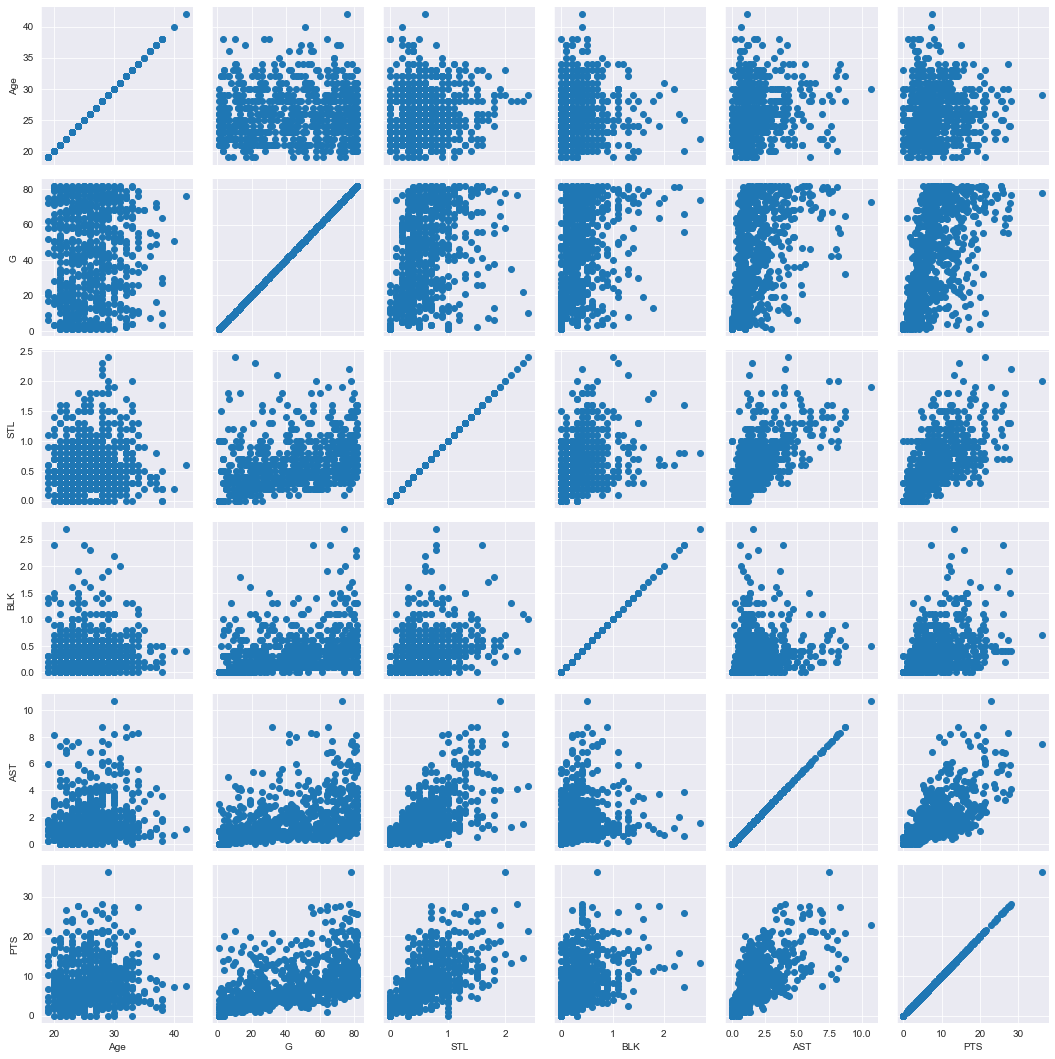

In [6]:
sns.set_style("darkgrid")
s = sns.PairGrid(df_scatter)
s.map(plt.scatter)

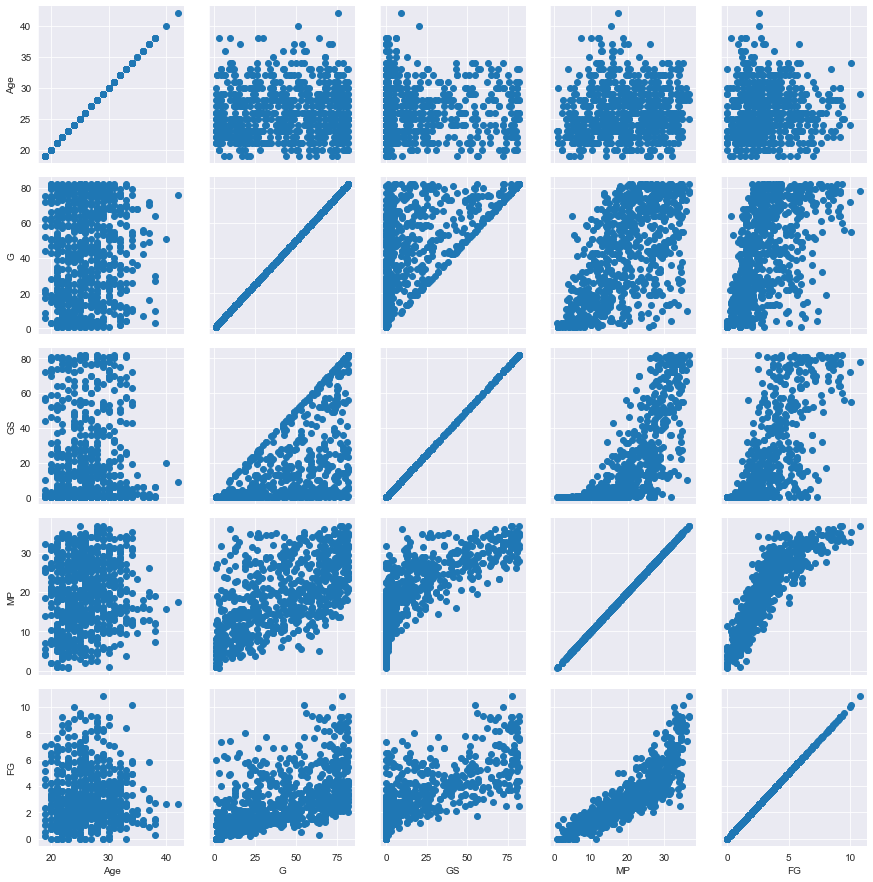

In [16]:
s = sns.PairGrid(df2k19.select_dtypes(include=["number"]).iloc[:,:5])
s.map(plt.scatter)